## Import Packages and CSV files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
import warnings
warnings.filterwarnings("ignore")
import altair as alt

In [2]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

# Data Exploration

In [3]:
#confirming import
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,714,784,840,906,933,996,1026,1092,1176,1279
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,475,494,518,539,548,562,584,609,634,663
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,659,673,673,696,704,713,717,717,723,723
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,24,24,24,24,25,25


In [4]:
#Checking length of each dataset
print(len(confirmed_df))
print(len(deaths_df))
print(len(recovered_df))

264
264
250


recovered_df has less rows

In [5]:
#checking the number of unique countries/region
unique_countries_confirmed = confirmed_df['Country/Region'].unique()
unique_countries_deaths = deaths_df['Country/Region'].unique()
unique_countries_recovered = recovered_df['Country/Region'].unique()

print(len(unique_countries_confirmed))
print(len(unique_countries_deaths))
print(len(unique_countries_recovered))

185
185
185


There are the same amount of countries in each .csv. This means there are reduced province/state in recovered_df. This means that the provinces need to be combined into the country row. We have no way to fill in Province/State with missing values. It is a string therefore we cannot impute with mean/median, and cannot use mode as each province is unqiue and does not make sense for this dataset.

In [6]:
#used to check the datatypes of each .csv
print(confirmed_df.info())
print(deaths_df.info())
print(recovered_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 97 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

In [7]:
#Checking Lat/Long for confirmed_df
print(confirmed_df[confirmed_df.Lat == 0])
print(confirmed_df[confirmed_df.Long == 0])

       Province/State    Country/Region  Lat  Long  1/22/20  1/23/20  1/24/20  \
88                NaN  Diamond Princess  0.0   0.0        0        0        0   
231  Diamond Princess            Canada  0.0   0.0        0        0        0   
238         Recovered            Canada  0.0   0.0        0        0        0   
252               NaN        MS Zaandam  0.0   0.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  4/14/20  4/15/20  4/16/20  4/17/20  \
88         0        0        0  ...      712      712      712      712   
231        0        0        0  ...       -1       -1       -1       -1   
238        0        0        0  ...        0        0        0        0   
252        0        0        0  ...        9        9        9        9   

     4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  
88       712      712      712      712      712      712  
231       -1       -1       -1       -1       -1        0  
238        0        0        0        

In [8]:
#Checking Lat/Long for deaths_df
print(deaths_df[deaths_df.Lat == 0])
print(deaths_df[deaths_df.Long == 0])

       Province/State    Country/Region  Lat  Long  1/22/20  1/23/20  1/24/20  \
88                NaN  Diamond Princess  0.0   0.0        0        0        0   
231  Diamond Princess            Canada  0.0   0.0        0        0        0   
238         Recovered            Canada  0.0   0.0        0        0        0   
252               NaN        MS Zaandam  0.0   0.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  4/14/20  4/15/20  4/16/20  4/17/20  \
88         0        0        0  ...       12       12       12       13   
231        0        0        0  ...       -1       -1       -1       -1   
238        0        0        0  ...        0        0        0        0   
252        0        0        0  ...        2        2        2        2   

     4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  
88        13       13       13       13       13       13  
231       -1       -1       -1       -1       -1        1  
238        0        0        0        

In [9]:
#Checking Lat/Long for recovered_df
print(recovered_df[recovered_df.Lat == 0])
print(recovered_df[recovered_df.Long == 0])

    Province/State    Country/Region  Lat  Long  1/22/20  1/23/20  1/24/20  \
79             NaN  Diamond Princess  0.0   0.0        0        0        0   
238            NaN        MS Zaandam  0.0   0.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  4/14/20  4/15/20  4/16/20  4/17/20  \
79         0        0        0  ...      639      639      644      644   
238        0        0        0  ...        0        0        0        0   

     4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  
79       644      644      644      644      644      645  
238        0        0        0        0        0        0  

[2 rows x 97 columns]
    Province/State    Country/Region  Lat  Long  1/22/20  1/23/20  1/24/20  \
79             NaN  Diamond Princess  0.0   0.0        0        0        0   
238            NaN        MS Zaandam  0.0   0.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  4/14/20  4/15/20  4/16/20  4/17/20  \
79         0        0     

## Removing rows with unreliable values

In [10]:
#confirmed_df.drop
index_names = confirmed_df[confirmed_df['Lat'] == 0].index
confirmed_df.drop(index_names, inplace = True) #Remove records with 0

#deaths_df.drop
index_names = deaths_df[deaths_df['Lat'] == 0].index
deaths_df.drop(index_names, inplace = True)

#recovered_df.drop
index_names = recovered_df[recovered_df['Lat'] == 0].index
recovered_df.drop(index_names, inplace = True)

#to confirm drop
print(len(confirmed_df))
print(len(deaths_df))
print(len(recovered_df))

print()
#to recalculate unique values in country/region
unique_countries_confirmed = confirmed_df['Country/Region'].unique()
unique_countries_deaths = deaths_df['Country/Region'].unique()
unique_countries_recovered = recovered_df['Country/Region'].unique()

#how many unique countries remain
print(len(unique_countries_confirmed))
print(len(unique_countries_deaths))
print(len(unique_countries_recovered))

260
260
248

183
183
183


We can see that the uniques of each dataset dropped by two. This is the removal of Diamond Princess and MS Zaandam. The two rows of Canada as the Country/Region did not reduce the unique numbers as Canada exists elsewhere. Need to find the 12 more records.

In [11]:
#Count number of occurences in each Country/Region in confirmed_df
country_counts = confirmed_df.groupby(["Country/Region"]).count().sort_values(["Lat"],ascending = False).reset_index()
print(country_counts)

     Country/Region  Province/State  Lat  Long  1/22/20  1/23/20  1/24/20  \
0             China              33   33    33       33       33       33   
1            Canada              13   13    13       13       13       13   
2    United Kingdom              10   11    11       11       11       11   
3            France              10   11    11       11       11       11   
4         Australia               8    8     8        8        8        8   
..              ...             ...  ...   ...      ...      ...      ...   
178          Greece               0    1     1        1        1        1   
179         Grenada               0    1     1        1        1        1   
180       Guatemala               0    1     1        1        1        1   
181          Guinea               0    1     1        1        1        1   
182        Zimbabwe               0    1     1        1        1        1   

     1/25/20  1/26/20  1/27/20  ...  4/14/20  4/15/20  4/16/20  4/17/20  \


In [12]:
#Count number of occurences in each Country/Region in deaths_df
country_counts2 = deaths_df.groupby(["Country/Region"]).count().sort_values(["Lat"],ascending = False).reset_index()
print(country_counts2)

     Country/Region  Province/State  Lat  Long  1/22/20  1/23/20  1/24/20  \
0             China              33   33    33       33       33       33   
1            Canada              13   13    13       13       13       13   
2    United Kingdom              10   11    11       11       11       11   
3            France              10   11    11       11       11       11   
4         Australia               8    8     8        8        8        8   
..              ...             ...  ...   ...      ...      ...      ...   
178          Greece               0    1     1        1        1        1   
179         Grenada               0    1     1        1        1        1   
180       Guatemala               0    1     1        1        1        1   
181          Guinea               0    1     1        1        1        1   
182        Zimbabwe               0    1     1        1        1        1   

     1/25/20  1/26/20  1/27/20  ...  4/14/20  4/15/20  4/16/20  4/17/20  \


### deaths_df and confirmed_df are the same as expected. Testing on recovered_df

In [13]:
#Count number of occurences in each Country/Region in recovered_df
country_counts3 = recovered_df.groupby(["Country/Region"]).count().sort_values(["Lat"],ascending = False).reset_index()
print(country_counts3)

     Country/Region  Province/State  Lat  Long  1/22/20  1/23/20  1/24/20  \
0             China              33   33    33       33       33       33   
1            France              10   11    11       11       11       11   
2    United Kingdom              10   11    11       11       11       11   
3         Australia               8    8     8        8        8        8   
4       Netherlands               4    5     5        5        5        5   
..              ...             ...  ...   ...      ...      ...      ...   
178           Ghana               0    1     1        1        1        1   
179          Greece               0    1     1        1        1        1   
180         Grenada               0    1     1        1        1        1   
181       Guatemala               0    1     1        1        1        1   
182        Zimbabwe               0    1     1        1        1        1   

     1/25/20  1/26/20  1/27/20  ...  4/14/20  4/15/20  4/16/20  4/17/20  \


deaths_df and confirmed_df have 13 occurences of Canada as a country. This is not the case in recovered_df. Will now check how many occurences of Canada are in recovered

In [14]:
#print records with "Canada" as Country/Region
print(recovered_df[recovered_df["Country/Region"] == "Canada"])

   Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
36            NaN         Canada  56.1304 -106.3468        0        0   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  4/14/20  4/15/20  4/16/20  \
36        0        0        0        0  ...     8210     8966     9698   

    4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  
36    10545    10964    11847    12543    13188    14454    14761  

[1 rows x 97 columns]


There is only one instance of Canada in recovered_df. This explains the difference of 12 rows between confirmed/deaths and recovered datasets. We need to either remove all of Canada from all three datasets (not ideal) or combine each province into one country. We need to preserve one Lat/Long of each country to be able to answer 5.2 and 5.3. As we will be combining rows to make one record per country, the Province/State column becomes redundant and can be removed.

In [15]:
#dropping Province/State column for each .csv
confirmed_df = confirmed_df.drop('Province/State',axis=1)
deaths_df = deaths_df.drop('Province/State',axis=1)
recovered_df = recovered_df.drop('Province/State',axis=1)

#confirming deletion
print("confirmed_df")
print(confirmed_df.head())
print("deaths_df")
print(deaths_df.head())
print("recovered_df")
print(recovered_df.head())

confirmed_df
  Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.0000  65.0000        0        0        0        0   
1        Albania  41.1533  20.1683        0        0        0        0   
2        Algeria  28.0339   1.6596        0        0        0        0   
3        Andorra  42.5063   1.5218        0        0        0        0   
4         Angola -11.2027  17.8739        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  4/14/20  4/15/20  4/16/20  4/17/20  \
0        0        0        0  ...      714      784      840      906   
1        0        0        0  ...      475      494      518      539   
2        0        0        0  ...     2070     2160     2268     2418   
3        0        0        0  ...      659      673      673      696   
4        0        0        0  ...       19       19       19       19   

   4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  
0      933      996     1026     1092     117

## Combining countries into one consolidated row

Below:
Taking the first value of each column for every country. This was done to just take the first Lat/Long of each country.

In [16]:
confirmed_df_first = confirmed_df.groupby("Country/Region").first().reset_index()
deaths_df_first = deaths_df.groupby("Country/Region").first().reset_index()
recovered_df_first = recovered_df.groupby("Country/Region").first().reset_index()

Below:
Summing each value of confirmed/death/recovered (for each dataset) for each date so that rows that have been combined into one country have a sum of cases for each confirmed/death/recovered.

In [17]:
confirmed_df = confirmed_df.groupby(["Country/Region"]).sum().reset_index()
deaths_df = deaths_df.groupby(["Country/Region"]).sum().reset_index()
recovered_df = recovered_df.groupby(["Country/Region"]).sum().reset_index()

Below:
Replacing the first Lat/Long values into the datasets that the cases have been summed. This means that Lat/Long can still be used for Task 5.2 and 5.3.

In [18]:
confirmed_df.loc[(confirmed_df["Country/Region"] == confirmed_df_first["Country/Region"]),"Lat"] = confirmed_df_first.Lat
confirmed_df.loc[(confirmed_df["Country/Region"] == confirmed_df_first["Country/Region"]),"Long"] = confirmed_df_first.Long

deaths_df.loc[(deaths_df["Country/Region"] == deaths_df_first["Country/Region"]),"Lat"] = deaths_df_first.Lat
deaths_df.loc[(deaths_df["Country/Region"] == deaths_df_first["Country/Region"]),"Long"] = deaths_df_first.Long

recovered_df.loc[(recovered_df["Country/Region"] == recovered_df_first["Country/Region"]),"Lat"] = recovered_df_first.Lat
recovered_df.loc[(recovered_df["Country/Region"] == recovered_df_first["Country/Region"]),"Long"] = recovered_df_first.Long

#we don't need to keep this but I've put it in so that you can see the final result.
confirmed_df.to_csv("testoutput.csv", index = False)
deaths_df.to_csv("testdeathoutput.csv", index = False)
recovered_df.to_csv("testrecoutput.csv", index = False)

# Normalisation

In [19]:
#bringing in population data
pop_df = pd.read_csv('population-figures-by-country-csv_csv.csv')
pop_df.head()

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [20]:
#remove all other years. 2016 most recent population data.
pop_df = pop_df[["Country","Year_2016"]].copy()
print(pop_df)

          Country  Year_2016
0           Aruba     104822
1     Afghanistan   34656032
2          Angola   28813463
3         Albania    2876101
4         Andorra      77281
..            ...        ...
258        Kosovo    1816200
259   Yemen, Rep.   27584213
260  South Africa   55908865
261        Zambia   16591390
262      Zimbabwe   16150362

[263 rows x 2 columns]


In [21]:
#Merging based on Country column to include Year_2016
confirmed_df = pd.merge(confirmed_df, pop_df, left_on = ["Country/Region"], right_on = ["Country"], how = "inner")

deaths_df = pd.merge(deaths_df, pop_df, left_on = ["Country/Region"], right_on = ["Country"], how = "inner")

recovered_df = pd.merge(recovered_df, pop_df, left_on = ["Country/Region"], right_on = ["Country"], how = "inner")
recovered_df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country,Year_2016
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,54,99,112,131,135,150,166,179,Afghanistan,34656032
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,277,283,302,314,327,345,356,385,Albania,2876101
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,783,846,894,1047,1099,1152,1204,1355,Algeria,40606052
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,169,191,205,235,248,282,309,333,Andorra,77281
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,5,5,6,6,6,6,6,6,Angola,28813463


In [22]:
#Dropping additional Country column
confirmed_df = confirmed_df.drop("Country", axis = 1)

deaths_df = deaths_df.drop("Country", axis = 1)

recovered_df = recovered_df.drop("Country", axis = 1)

recovered_df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Year_2016
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,43,54,99,112,131,135,150,166,179,34656032
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,251,277,283,302,314,327,345,356,385,2876101
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,708,783,846,894,1047,1099,1152,1204,1355,40606052
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,169,169,191,205,235,248,282,309,333,77281
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,5,5,5,6,6,6,6,6,6,28813463


In [23]:
#moving Year_2016 to start of dataset
col_name = "Year_2016"
pop_col = confirmed_df.pop(col_name)
confirmed_df.insert(1, col_name, pop_col)

pop_col = deaths_df.pop(col_name)
deaths_df.insert(1, col_name, pop_col)

pop_col = recovered_df.pop(col_name)
recovered_df.insert(1, col_name, pop_col)

create column

loop through each row

loop through each column, find =>10

once found, update column with column name (date)

In [24]:
#Adding new Day_Zero column
confirmed_df['Day_Zero']= ""

#moving Day_Zero
col_name = "Day_Zero"
zero_col = confirmed_df.pop(col_name)
confirmed_df.insert(4, col_name,zero_col)

#loop through each column within each row and save date when cases >=10
for i, row in confirmed_df.iterrows():
    for name, value in row[5:].iteritems():
        if value >=10:
            confirmed_df.at[i,"Day_Zero"] = name
            break

#insert Day Zero for deaths and moving to column 5
deaths_df["Day_Zero"] = confirmed_df["Day_Zero"]
col_name = "Day_Zero"
zero_col = deaths_df.pop(col_name)
deaths_df.insert(4, col_name,zero_col)

#insert Day Zero for recovered and moving to column 5
recovered_df["Day_Zero"] = confirmed_df["Day_Zero"]
col_name = "Day_Zero"
zero_col = recovered_df.pop(col_name)
recovered_df.insert(4, col_name,zero_col)


recovered_df.head()

,Country/Region,Year_2016,Lat,Long,Day_Zero,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,Afghanistan,34656032,33.0000,65.0000,3/14/20,0,0,0,0,0,...,40,43,54,99,112,131,135,150,166,179
1,Albania,2876101,41.1533,20.1683,3/10/20,0,0,0,0,0,...,248,251,277,283,302,314,327,345,356,385
2,Algeria,40606052,28.0339,1.6596,3/4/20,0,0,0,0,0,...,691,708,783,846,894,1047,1099,1152,1204,1355
3,Andorra,77281,42.5063,1.5218,3/17/20,0,0,0,0,0,...,128,169,169,191,205,235,248,282,309,333
4,Angola,28813463,-11.2027,17.8739,4/4/20,0,0,0,0,0,...,5,5,5,5,6,6,6,6,6,6


In [25]:
#normalising confirmed_df cases by representing cases per population
confirmed_df_norm = confirmed_df.copy()
confirmed_df_norm.iloc[:,5:] = confirmed_df.iloc[:,5:].div(confirmed_df["Year_2016"], axis = 0)

#normalising deaths_df cases by representing cases per population
deaths_df_norm = deaths_df.copy()
deaths_df_norm.iloc[:,5:] = deaths_df.iloc[:,5:].div(deaths_df["Year_2016"], axis = 0)

#normalising deaths_df cases by representing cases per population
recovered_df_norm = recovered_df.copy()
recovered_df_norm.iloc[:,5:] = recovered_df.iloc[:,5:].div(recovered_df["Year_2016"], axis = 0)
    
recovered_df_norm.head()

,Country/Region,Year_2016,Lat,Long,Day_Zero,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,Afghanistan,34656032,33.0000,65.0000,3/14/20,0.0,0.0,0.0,0.0,0.0,...,1.154200e-06,1.240765e-06,1.558170e-06,2.856646e-06,3.231761e-06,3.780006e-06,3.895426e-06,4.328251e-06,4.789931e-06,5.165046e-06
1,Albania,2876101,41.1533,20.1683,3/10/20,0.0,0.0,0.0,0.0,0.0,...,8.622785e-05,8.727093e-05,9.631094e-05,9.839710e-05,1.050033e-04,1.091756e-04,1.136956e-04,1.199541e-04,1.237787e-04,1.338618e-04
2,Algeria,40606052,28.0339,1.6596,3/4/20,0.0,0.0,0.0,0.0,0.0,...,1.701717e-05,1.743582e-05,1.928284e-05,2.083433e-05,2.201642e-05,2.578433e-05,2.706493e-05,2.837016e-05,2.965075e-05,3.336941e-05
3,Andorra,77281,42.5063,1.5218,3/17/20,0.0,0.0,0.0,0.0,0.0,...,1.656293e-03,2.186825e-03,2.186825e-03,2.471500e-03,2.652657e-03,3.040851e-03,3.209068e-03,3.649021e-03,3.998395e-03,4.308950e-03
4,Angola,28813463,-11.2027,17.8739,4/4/20,0.0,0.0,0.0,0.0,0.0,...,1.735300e-07,1.735300e-07,1.735300e-07,1.735300e-07,2.082360e-07,2.082360e-07,2.082360e-07,2.082360e-07,2.082360e-07,2.082360e-07


In [26]:
#Export normalised data to new .csv as some questions require raw data
#confirmed_df_norm.to_csv("confirmed_df_norm.csv", index = False)
#deaths_df_norm.to_csv("deaths_df_norm.csv", index = False)
#recovered_df_norm.to_csv("recovered_df_norm.csv", index = False)

### Question 4.3

1st confirmed case, 1st confirmed date

In [27]:
#adding new column for first day of recovery (from outbreak)
recovered_df['First_Recovery_Date']= ""

#moving First_Recovery_Date
col_name = "First_Recovery_Date"
first_col = recovered_df.pop(col_name)
recovered_df.insert(5, col_name,first_col)

#loop through each column within each row and save date when cases >=10
for i, row in recovered_df.iterrows():
    for name, value in row[6:].iteritems():
        if value >=10:
            recovered_df.at[i,"First_Recovery_Date"] = name
            break

#insert First_Recovery_Date for deaths and moving to column 5
deaths_df["First_Recovery_Date"] = recovered_df["First_Recovery_Date"]
col_name = "First_Recovery_Date"
first_col = deaths_df.pop(col_name)
deaths_df.insert(5, col_name,first_col)

#insert First_Recovery_Date for confirmed and moving to column 5
confirmed_df["First_Recovery_Date"] = recovered_df["First_Recovery_Date"]
col_name = "First_Recovery_Date"
first_col = confirmed_df.pop(col_name)
confirmed_df.insert(5, col_name,first_col)

In [28]:
#changing string dtype of First_Recovery_Date to date
recovered_df['First_Recovery_Date'] = pd.to_datetime(recovered_df['First_Recovery_Date'])

#changing string dtype of Day_Zero to date
recovered_df['Day_Zero'] = pd.to_datetime(recovered_df['Day_Zero'])

In [29]:
#recovery length column (recovery_time = recovery - day_zero)
recovered_df["Recovery_Time"] = (recovered_df["First_Recovery_Date"] - recovered_df["Day_Zero"]).dt.days

#moving Recovery_Time column
col_name = "Recovery_Time"
rec_col = recovered_df.pop(col_name)
recovered_df.insert(6, col_name,rec_col)

#insert Recovery_Time for deaths and moving to column 5
deaths_df["Recovery_Time"] = recovered_df["Recovery_Time"]
col_name = "Recovery_Time"
rec_col = deaths_df.pop(col_name)
deaths_df.insert(6, col_name,rec_col)

#insert Recovery_Time for confirmed and moving to column 5
confirmed_df["Recovery_Time"] = recovered_df["Recovery_Time"]
col_name = "Recovery_Time"
rec_col = confirmed_df.pop(col_name)
confirmed_df.insert(6, col_name,rec_col)

In [30]:
recovered_df.head()

,Country/Region,Year_2016,Lat,Long,Day_Zero,First_Recovery_Date,Recovery_Time,1/22/20,1/23/20,1/24/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,Afghanistan,34656032,33.0000,65.0000,2020-03-14,2020-04-02,19.0,0,0,0,...,40,43,54,99,112,131,135,150,166,179
1,Albania,2876101,41.1533,20.1683,2020-03-10,2020-03-24,14.0,0,0,0,...,248,251,277,283,302,314,327,345,356,385
2,Algeria,40606052,28.0339,1.6596,2020-03-04,2020-03-14,10.0,0,0,0,...,691,708,783,846,894,1047,1099,1152,1204,1355
3,Andorra,77281,42.5063,1.5218,2020-03-17,2020-03-30,13.0,0,0,0,...,128,169,169,191,205,235,248,282,309,333
4,Angola,28813463,-11.2027,17.8739,2020-04-04,NaT,NaN,0,0,0,...,5,5,5,5,6,6,6,6,6,6


In [31]:
print("Mean Days to Recover: ", recovered_df['Recovery_Time'].mean())
print("Median Days to Recover: ", recovered_df['Recovery_Time'].median())

Mean Days to Recover:  15.984375
Median Days to Recover:  15.0


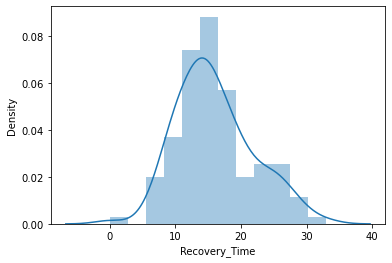

In [32]:
#distribution
dg = sns.distplot(recovered_df['Recovery_Time'])
plt.show()

In [33]:
sorted_recovered_df = recovered_df.sort_values(by = "Recovery_Time", ascending = False)
sorted_recovered_df = sorted_recovered_df.head(10)

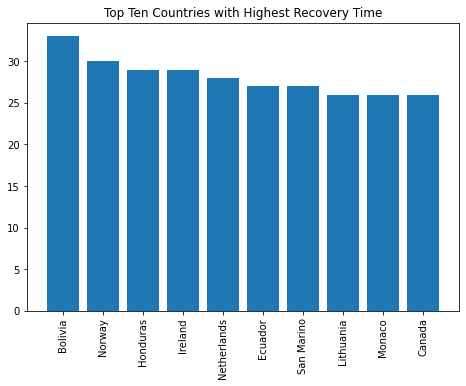

In [34]:
#bar plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_recovered_df['Country/Region'], sorted_recovered_df['Recovery_Time'])
plt.rcParams["figure.figsize"] = (10,6)
plt.xticks(rotation = 90)
plt.title("Top Ten Countries with Highest Recovery Time")
plt.show()

In [35]:
sorted_recovered_df = recovered_df.sort_values(by = "Recovery_Time")
sorted_recovered_df = sorted_recovered_df.head(10)

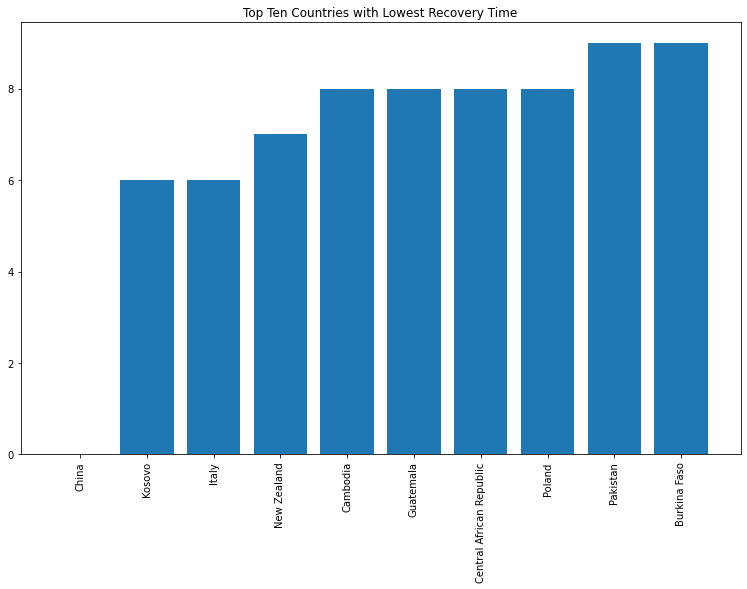

In [36]:
#bar plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_recovered_df['Country/Region'], sorted_recovered_df['Recovery_Time'])
plt.rcParams["figure.figsize"] = (1,1)
plt.xticks(rotation = 90)
plt.title("Top Ten Countries with Lowest Recovery Time")
plt.show()

Bolivia - Canada take ~25 days, Kosovo - Burkina far fewer days. China had their cases before this.

More distribution around ~15 days. Dataset is positively skewed so more likely to take longer to recover than less time. Mean > Median.

### 4.4
Active Cases = Confirmed - Recovered - Deaths

In [37]:
active_case = confirmed_df["4/23/20"] - deaths_df["4/23/20"] - recovered_df["4/23/20"]
print(active_case)

0      1058
1       251
2      1245
3       353
4        17
       ... 
152    1190
153      44
154     384
155      36
156      22
Name: 4/23/20, Length: 157, dtype: int64


In [38]:
#Sorting by day_zero
confirmed_df = confirmed_df.dropna()
sorted_confirmed_df = confirmed_df.sort_values(by = "Day_Zero")
sorted_confirmed_df.head(15)

#Displays the countries to look at for early outbreak, therefore mitigation.

,Country/Region,Year_2016,Lat,Long,Day_Zero,First_Recovery_Date,Recovery_Time,1/22/20,1/23/20,1/24/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
33,China,1378665000,31.8257,117.2264,1/22/20,1/22/20,0.0,548,643,920,...,83306,83356,83403,83760,83787,83805,83817,83853,83868,83884
141,Thailand,68863514,15.0000,101.0000,1/28/20,2/8/20,11.0,2,3,5,...,2613,2643,2672,2700,2733,2765,2792,2811,2826,2839
74,Japan,126994511,36.0000,138.0000,1/30/20,2/15/20,16.0,2,2,2,...,7645,8100,8626,9787,10296,10797,10797,11135,11512,12368
129,Singapore,5607283,1.2833,103.8333,1/30/20,2/12/20,13.0,0,1,3,...,3252,3699,4427,5050,5992,6588,8014,9125,10141,11178
8,Australia,24127159,-35.4735,149.0124,2/1/20,2/17/20,16.0,0,0,0,...,6415,6440,6462,6522,6547,6547,6547,6547,6547,6661
55,Germany,82667685,51.0000,9.0000,2/2/20,2/18/20,16.0,0,0,0,...,131359,134753,137698,141397,143342,145184,147065,148291,150648,153129
72,Italy,60600590,43.0000,12.0000,2/21/20,2/27/20,6.0,0,0,0,...,162488,165155,168941,172434,175925,178972,181228,183957,187327,189973
149,United Arab Emirates,9269612,24.0000,54.0000,2/22/20,3/10/20,17.0,0,0,0,...,4933,5365,5825,6302,6302,6781,7265,7755,8238,8756
150,United Kingdom,65637239,32.3078,-64.7505,2/24/20,3/7/20,12.0,0,0,0,...,94845,99483,104145,109769,115314,121172,125856,130172,134638,139246
29,Canada,36286425,53.9333,-116.5765,2/24/20,3/21/20,26.0,0,0,0,...,27035,28209,30809,32814,34356,35633,37658,39402,41649,43285


In [39]:
#Remove Day_Zero and Recovery_Date
confirmed_df = confirmed_df.drop(['Day_Zero', 'First_Recovery_Date'],axis=1)
deaths_df = deaths_df.drop(['Day_Zero', 'First_Recovery_Date'],axis=1)
recovered_df = recovered_df.drop(['Day_Zero', 'First_Recovery_Date'],axis=1)

In [40]:
#Unpivot dataframes
            
dates = confirmed_df.columns[5:]

confirmed_df_long = confirmed_df.melt(
    id_vars = ["Country/Region", "Year_2016", "Lat", "Long", "Recovery_Time"], 
    value_vars = dates,
    var_name = "Date",
    value_name = "Confirmed")

deaths_df_long = deaths_df.melt(
    id_vars = ["Country/Region", "Year_2016", "Lat", "Long", "Recovery_Time"], 
    value_vars = dates,
    var_name = "Date",
    value_name = "Deaths")

recovered_df_long = recovered_df.melt(
    id_vars = ["Country/Region", "Year_2016", "Lat", "Long", "Recovery_Time"], 
    value_vars = dates,
    var_name = "Date",
    value_name = "Recovered")

In [41]:
confirmed_df_long

,Country/Region,Year_2016,Lat,Long,Recovery_Time,Date,Confirmed
0,Afghanistan,34656032,33.0000,65.0000,19.0,1/22/20,0
1,Albania,2876101,41.1533,20.1683,14.0,1/22/20,0
2,Algeria,40606052,28.0339,1.6596,10.0,1/22/20,0
3,Andorra,77281,42.5063,1.5218,13.0,1/22/20,0
4,Antigua and Barbuda,100963,17.0608,-61.7964,19.0,1/22/20,0
...,...,...,...,...,...,...,...
11899,Uruguay,3444006,-32.5228,-55.7658,14.0,4/23/20,557
11900,Uzbekistan,31848200,41.3775,64.5853,15.0,4/23/20,1758
11901,Vietnam,92701100,16.0000,108.0000,15.0,4/23/20,268
11902,West Bank and Gaza,4551566,31.9522,35.2332,13.0,4/23/20,480


In [42]:
#Merging based on Country, Date, Lat, Long

combined_df = confirmed_df_long.merge(
    right = deaths_df_long,
    how = "left",
    on = ["Country/Region", "Date", "Lat", "Long", "Year_2016", "Recovery_Time"])

combined_df = combined_df.merge(
    right = recovered_df_long,
    how = "left",
    on = ["Country/Region", "Date", "Lat", "Long", "Year_2016", "Recovery_Time"])

In [43]:
combined_df

,Country/Region,Year_2016,Lat,Long,Recovery_Time,Date,Confirmed,Deaths,Recovered
0,Afghanistan,34656032,33.0000,65.0000,19.0,1/22/20,0,0,0.0
1,Albania,2876101,41.1533,20.1683,14.0,1/22/20,0,0,0.0
2,Algeria,40606052,28.0339,1.6596,10.0,1/22/20,0,0,0.0
3,Andorra,77281,42.5063,1.5218,13.0,1/22/20,0,0,0.0
4,Antigua and Barbuda,100963,17.0608,-61.7964,19.0,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...,...
11899,Uruguay,3444006,-32.5228,-55.7658,14.0,4/23/20,557,12,354.0
11900,Uzbekistan,31848200,41.3775,64.5853,15.0,4/23/20,1758,7,561.0
11901,Vietnam,92701100,16.0000,108.0000,15.0,4/23/20,268,0,224.0
11902,West Bank and Gaza,4551566,31.9522,35.2332,13.0,4/23/20,480,4,92.0


In [44]:
# Active Cases = Confirmed - Deaths - Recovered
combined_df["Active"] = combined_df["Confirmed"] - combined_df["Deaths"] - combined_df["Recovered"]
combined_df

,Country/Region,Year_2016,Lat,Long,Recovery_Time,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,34656032,33.0000,65.0000,19.0,1/22/20,0,0,0.0,0.0
1,Albania,2876101,41.1533,20.1683,14.0,1/22/20,0,0,0.0,0.0
2,Algeria,40606052,28.0339,1.6596,10.0,1/22/20,0,0,0.0,0.0
3,Andorra,77281,42.5063,1.5218,13.0,1/22/20,0,0,0.0,0.0
4,Antigua and Barbuda,100963,17.0608,-61.7964,19.0,1/22/20,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11899,Uruguay,3444006,-32.5228,-55.7658,14.0,4/23/20,557,12,354.0,191.0
11900,Uzbekistan,31848200,41.3775,64.5853,15.0,4/23/20,1758,7,561.0,1190.0
11901,Vietnam,92701100,16.0000,108.0000,15.0,4/23/20,268,0,224.0,44.0
11902,West Bank and Gaza,4551566,31.9522,35.2332,13.0,4/23/20,480,4,92.0,384.0


In [45]:
combined_df["Active/Confirmed"] = combined_df["Active"]/combined_df["Confirmed"]
combined_df

,Country/Region,Year_2016,Lat,Long,Recovery_Time,Date,Confirmed,Deaths,Recovered,Active,Active/Confirmed
0,Afghanistan,34656032,33.0000,65.0000,19.0,1/22/20,0,0,0.0,0.0,NaN
1,Albania,2876101,41.1533,20.1683,14.0,1/22/20,0,0,0.0,0.0,NaN
2,Algeria,40606052,28.0339,1.6596,10.0,1/22/20,0,0,0.0,0.0,NaN
3,Andorra,77281,42.5063,1.5218,13.0,1/22/20,0,0,0.0,0.0,NaN
4,Antigua and Barbuda,100963,17.0608,-61.7964,19.0,1/22/20,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11899,Uruguay,3444006,-32.5228,-55.7658,14.0,4/23/20,557,12,354.0,191.0,0.342908
11900,Uzbekistan,31848200,41.3775,64.5853,15.0,4/23/20,1758,7,561.0,1190.0,0.676906
11901,Vietnam,92701100,16.0000,108.0000,15.0,4/23/20,268,0,224.0,44.0,0.164179
11902,West Bank and Gaza,4551566,31.9522,35.2332,13.0,4/23/20,480,4,92.0,384.0,0.800000


In [46]:
#Using the top 15 from earlier, display active cases relative to confirmed
Country = "Italy"

In [47]:
#Using the top 15 from earlier, display active cases relative to confirmed
Country_Name = combined_df[combined_df["Country/Region"] == Country]

chart = alt.Chart(Country_Name).mark_bar().encode(x = "monthdate(Date):O",).properties(width = 500)

chart.encode(y = "Active").properties(title = "Active Cases")

#Thailand, Germany, Australia-ish, Italy

alt.Chart(...)

In [48]:
countries = ['Thailand', 'Germany', 'Australia', 'Sweden', 'Norway', 'Italy']
selected_countries = combined_df[combined_df['Country/Region'].isin(countries)]

alt.Chart(selected_countries).mark_circle().encode(
x='monthdate(Date):O',
y='Country/Region',
color='Country/Region',
size=alt.Size('Active:Q',
scale=alt.Scale(range=[0, 1000]),
legend=alt.Legend(title='Active Cases')
)
).properties(
width=800,
height=300
)

alt.Chart(...)

In [49]:
index_names = combined_df[combined_df['Country/Region'] != Country].index
combined_df.drop(index_names, inplace = True) #Keep records of country of interest

In [50]:
combined_df

,Country/Region,Year_2016,Lat,Long,Recovery_Time,Date,Confirmed,Deaths,Recovered,Active,Active/Confirmed
57,Italy,60600590,43.0,12.0,6.0,1/22/20,0,0,0.0,0.0,NaN
185,Italy,60600590,43.0,12.0,6.0,1/23/20,0,0,0.0,0.0,NaN
313,Italy,60600590,43.0,12.0,6.0,1/24/20,0,0,0.0,0.0,NaN
441,Italy,60600590,43.0,12.0,6.0,1/25/20,0,0,0.0,0.0,NaN
569,Italy,60600590,43.0,12.0,6.0,1/26/20,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11321,Italy,60600590,43.0,12.0,6.0,4/19/20,178972,23660,47055.0,108257.0,0.604882
11449,Italy,60600590,43.0,12.0,6.0,4/20/20,181228,24114,48877.0,108237.0,0.597242
11577,Italy,60600590,43.0,12.0,6.0,4/21/20,183957,24648,51600.0,107709.0,0.585512
11705,Italy,60600590,43.0,12.0,6.0,4/22/20,187327,25085,54543.0,107699.0,0.574925


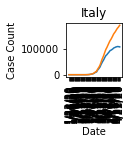

In [51]:
plt.plot(combined_df["Date"],combined_df["Active"])
plt.plot(combined_df["Date"],combined_df["Confirmed"])
plt.xticks(rotation = 90)
plt.title(Country)
plt.xlabel('Date')
plt.ylabel('Case Count')
#plt.rcParams["figure.figsize"] = (20,12)
plt.show()

#pick the best 4 looking graphs and discuss about it. Can mention that an issue is that this is looking at data very early on.
# want to see blue line flatten early compared to orange line
# May want to include a cooked country to say their mitigation sucks.

# 5.3